## Singapore's Public Bus Transport System

Name: <b>Ashley Bai</b>

Class: <b>DAAA/FT/1B/04</b>

Admission Number: <b>P2237871</b>

## Objective 1:                                                                                                                    
## How has Singapore's Bus System changed from the past & how has it affected commuters?

In [535]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import and read datasets
# public transport utilisation - average ridership
riderships = pd.read_csv('data/public-transport-utilisation-average-public-transport-ridership.csv')
# public transport capacity - average daily distance travelled
busDistancee = pd.read_csv('data/public-transport-capacity-average-daily-distance-travelled.csv')
# bus population by passenger capacity
busPopp = pd.read_csv('data/annual-bus-population-by-passenger-capacity.csv')
# commuter facilities - number of bus facilities
busFacc = pd.read_csv('data/commuter-facilities.csv')

## Cleaning 'ridership' dataframe

In [536]:
# what's inside the ridership dataframe (before cleaning)
riderships.head(5)

,year,type_of_public_transport,average_ridership
0,1995,MRT,740000
1,1995,LRT,0
2,1995,Bus,3009000
3,1995,Taxi,0
4,1996,MRT,850000


In [537]:
# check information of df (before cleaning)
# - number of non-null values
# - dtype of columns
riderships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      88 non-null     int64 
 1   type_of_public_transport  88 non-null     object
 2   average_ridership         88 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


In [538]:
# drop NA values 
riderships.dropna()

# only want years (2005-2013), drop other years
ridershipss = riderships.drop(riderships.index[0:40])
ridership = ridershipss.drop(riderships.index[76:88])
# reset index
ridership = ridership.reset_index(drop=True)

# only want bus data
# drop 'MRT'
for i in range (0,36,4):
    ridership.drop([i], inplace=True)

# drop 'LRT'
for i in range (1,36,4):
    ridership.drop([i], inplace=True)

# drop 'Taxi'
for i in range (3,36,4):
    ridership.drop([i], inplace=True)

# reset index
ridership = ridership.reset_index(drop=True)

# what's inside the ridership dataframe (after cleaning)
ridership.head(5)

,year,type_of_public_transport,average_ridership
0,2005,Bus,2779000
1,2006,Bus,2833000
2,2007,Bus,2932000
3,2008,Bus,3087000
4,2009,Bus,3047000


In [539]:
# check for number of duplicate values in 'year' column
ridership['year'].duplicated().sum()

0

In [540]:
# check information of df (after cleaning)
# - number of non-null values
# - dtype of columns
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      9 non-null      int64 
 1   type_of_public_transport  9 non-null      object
 2   average_ridership         9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [541]:
# numerical summary of ridership
ridership.describe().round()

,year,average_ridership
count,9.0,9.0
mean,2009.0,3149333.0
std,3.0,289572.0
min,2005.0,2779000.0
25%,2007.0,2932000.0
50%,2009.0,3087000.0
75%,2011.0,3385000.0
max,2013.0,3601000.0


In [542]:
# check for missing values
# returns True if there are missing/null values
print(ridership.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(ridership.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(ridership.isnull().sum(), "\n")

False 

0 

year                        0
type_of_public_transport    0
average_ridership           0
dtype: int64 



<AxesSubplot:>

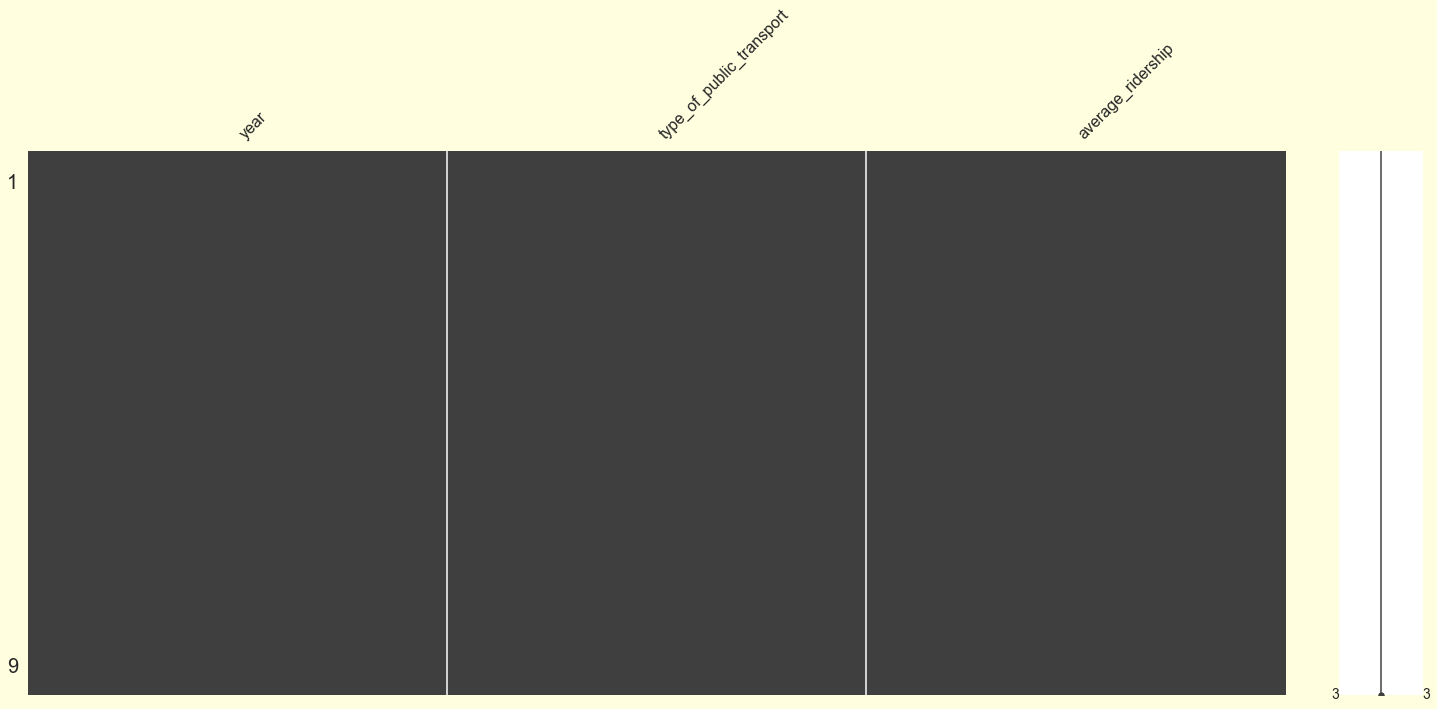

In [543]:
# visualisation of missing values in df 
import missingno as msno
msno.matrix(ridership)

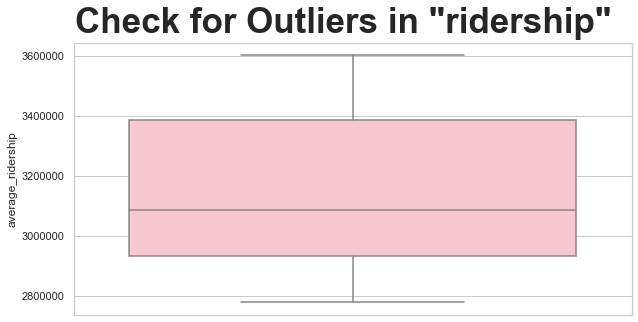

In [544]:
# -- identify outliers by plotting box plots -- 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers
# create figure & axis
fig, ax = plt.subplots(figsize=(10,5))
# set title for overall figure
fig.suptitle('Check for Outliers in "ridership"', weight="bold", fontsize=35)

# plot boxplot for 'average_ridership' column only 
sns.boxplot(y=ridership['average_ridership'], color='pink')
# remove scientific notation (y axis format from decimal to whole no.)
plt.ticklabel_format(style='plain', axis='y')

## Cleaning 'busDistance' dataframe

In [545]:
# what's inside the busDistance dataframe (before cleaning)
busDistancee.head(5)

,year,mrt,bus
0,2004,40700,819400
1,2005,41400,822200
2,2006,41200,833000
3,2007,42200,844200
4,2008,45200,826800


In [546]:
# check information of df (before cleaning)
# - number of non-null values
# - dtype of columns
busDistancee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    11 non-null     int64
 1   mrt     11 non-null     int64
 2   bus     11 non-null     int64
dtypes: int64(3)
memory usage: 392.0 bytes


In [547]:
# drop NA values 
busDistancee.dropna()

# only want years (2005-2013), drop other years
busDistt = busDistancee.drop(busDistancee.index[0:1])
busDistance = busDistt.drop(busDistancee.index[10:11])
# reset index
busDistance = busDistance.reset_index(drop=True)

# only want bus data
# drop mrt column
busDistance = busDistance.drop(columns=["mrt"])

# what's inside the busDist dataframe (after cleaning)
busDistance

,year,bus
0,2005,822200
1,2006,833000
2,2007,844200
3,2008,826800
4,2009,849400
5,2010,839700
6,2011,818700
7,2012,817500
8,2013,856600


In [548]:
# check columns in df (before cleaning)
print(busDistance.columns, "\n")

# rename column name (easier identification)
busDistance = busDistance.rename(columns={"bus":"distance_travelled_by_bus"})

# check columns in df (after cleaning)
print(busDistance.columns, "\n")

# what's inside the busDist dataframe (after cleaning)
busDistance.head(5)

Index(['year', 'bus'], dtype='object') 

Index(['year', 'distance_travelled_by_bus'], dtype='object') 



,year,distance_travelled_by_bus
0,2005,822200
1,2006,833000
2,2007,844200
3,2008,826800
4,2009,849400


In [549]:
# check for number of duplicate values in 'year' column
busDistance['year'].duplicated().sum()

0

In [550]:
# change the dtype of year from integer to string as it is a categorical variable
busDistance['year'] = busDistance['year'].astype('U10')

# check information of df (after cleaning)
# - number of non-null values
# - dtype of columns: dtype of year is now a string
busDistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       9 non-null      object
 1   distance_travelled_by_bus  9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [551]:
# numerical summary of busDistance
busDistance.describe().round()

,distance_travelled_by_bus
count,9.0
mean,834233.0
std,14064.0
min,817500.0
25%,822200.0
50%,833000.0
75%,844200.0
max,856600.0


In [552]:
# check for missing values
# returns True if there are missing/null values
print(busDistance.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(busDistance.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(busDistance.isnull().sum(), "\n")

False 

0 

year                         0
distance_travelled_by_bus    0
dtype: int64 



<AxesSubplot:>

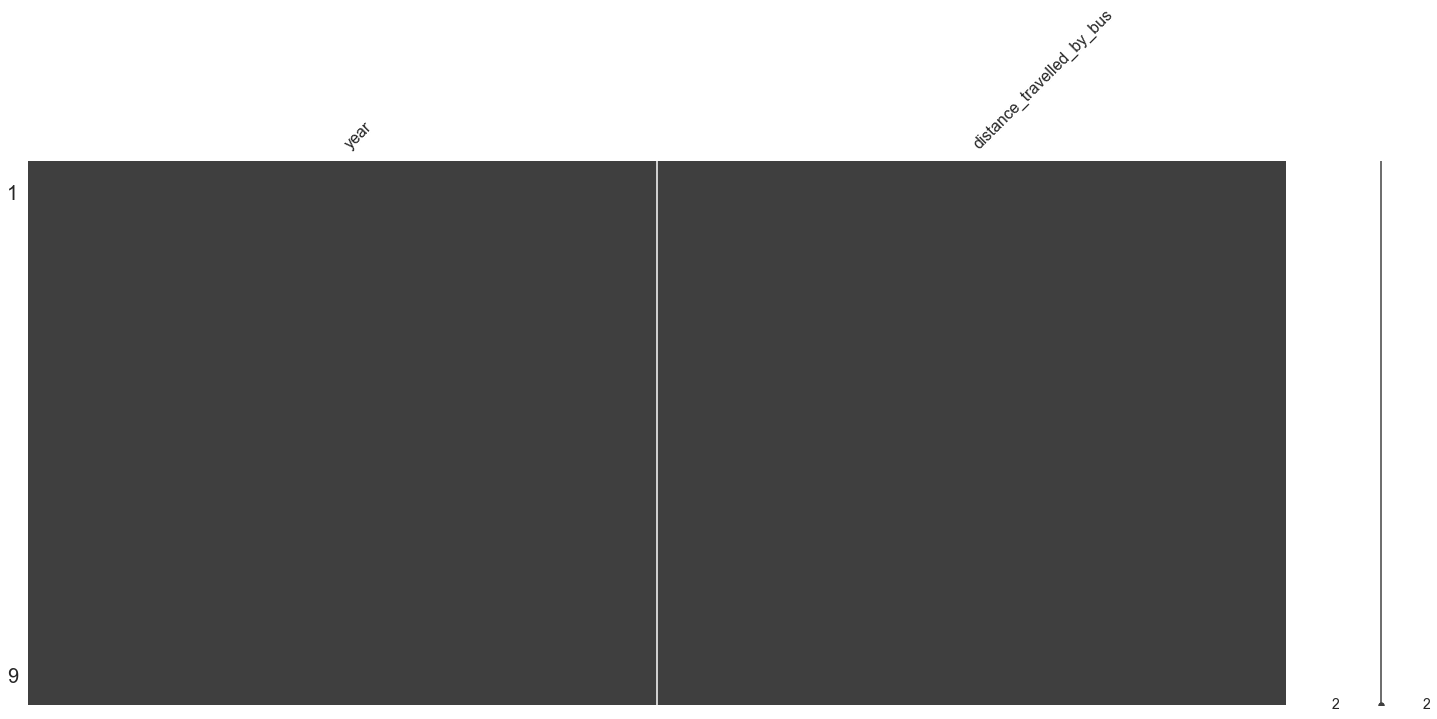

In [553]:
# visualisation of missing values in df 
import missingno as msno
msno.matrix(busDistance)

<AxesSubplot:ylabel='distance_travelled_by_bus'>

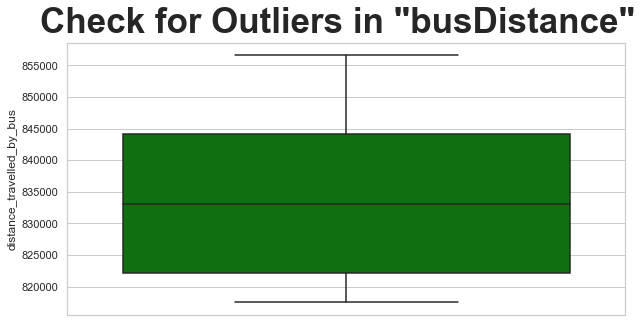

In [554]:
# -- identify outliers by plotting box plots -- 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers
# create figure & axis
fig, ax = plt.subplots(figsize=(10,5))
# set title for overall figure
fig.suptitle('Check for Outliers in "busDistance"', weight="bold", fontsize=35)

# plot boxplot for 'distance_travelled_by_bus' column only 
sns.boxplot(y=busDistance['distance_travelled_by_bus'], color='green')

## Cleaning 'busPop' dataframe

In [555]:
# what's inside the busPop dataframe (before cleaning)
busPopp.head(5)

,year,capacity,number
0,2005,<10,1467
1,2005,10-15,4234
2,2005,16-20,986
3,2005,21-25,250
4,2005,26-30,569


In [556]:
# check information of df (before cleaning)
# - number of non-null values
# - dtype of columns
busPopp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      182 non-null    int64 
 1   capacity  182 non-null    object
 2   number    182 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ KB


In [557]:
# drop NA values 
busPopp.dropna()

# only want years (2005-2013), drop other years
busPop = busPopp.drop(busPopp.index[126:182])
# reset index
busPop = busPop.reset_index(drop=True)

# what's inside the ridership dataframe (after cleaning)
busPop.head(5)

,year,capacity,number
0,2005,<10,1467
1,2005,10-15,4234
2,2005,16-20,986
3,2005,21-25,250
4,2005,26-30,569


In [558]:
# check columns in df (before cleaning)
print(busPop.columns, "\n")

# rename column name (easier identification)
busPop = busPop.rename(columns={"capacity":"passenger_capacity", "number":"no_of_buses"})

# check columns in df (after cleaning)
print(busPop.columns, "\n")

# what's inside the ridership dataframe (after cleaning)
busPop.head(5)

Index(['year', 'capacity', 'number'], dtype='object') 

Index(['year', 'passenger_capacity', 'no_of_buses'], dtype='object') 



,year,passenger_capacity,no_of_buses
0,2005,<10,1467
1,2005,10-15,4234
2,2005,16-20,986
3,2005,21-25,250
4,2005,26-30,569


In [559]:
# change the dtype of year from integer to string as it is a categorical variable
busPop['year'] = busPop['year'].astype('U10')

# check information of df (after cleaning)
# - number of non-null values
# - dtype of columns: dtype of year is now a string
busPop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                126 non-null    object
 1   passenger_capacity  126 non-null    object
 2   no_of_buses         126 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [560]:
# numerical summary of busPop
busPop.describe().round()

,no_of_buses
count,126.0
mean,1098.0
std,1529.0
min,0.0
25%,21.0
50%,476.0
75%,1484.0
max,5604.0


In [561]:
# check for missing values
# returns True if there are missing/null values
print(busPop.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(busPop.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(busPop.isnull().sum(), "\n")

False 

0 

year                  0
passenger_capacity    0
no_of_buses           0
dtype: int64 



<AxesSubplot:>

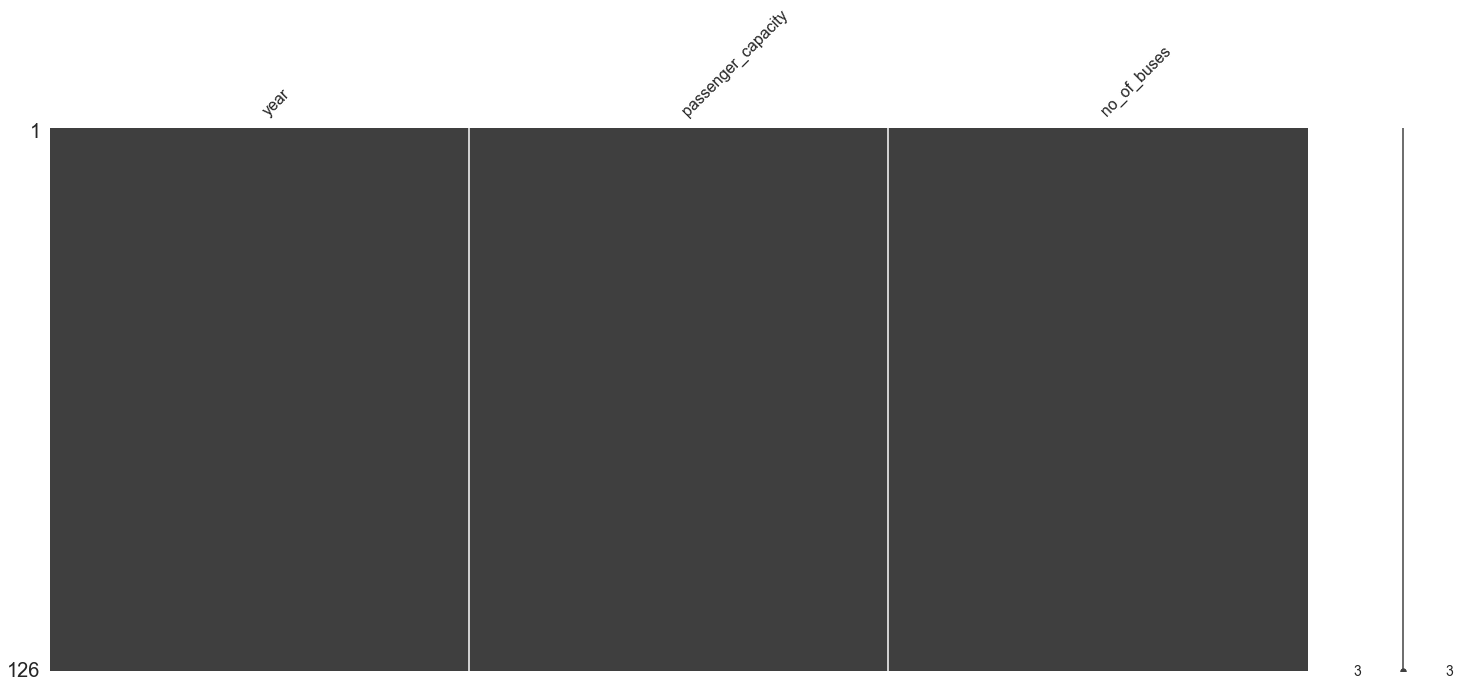

In [562]:
# visualisation of missing values in df 
import missingno as msno
msno.matrix(busPop)

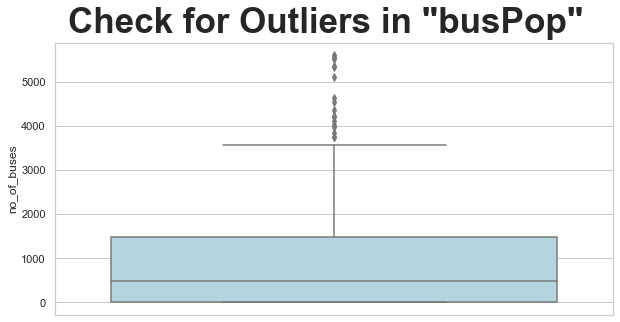

In [563]:
# -- identify outliers by plotting box plots -- 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers
# create figure & axis
fig, ax = plt.subplots(figsize=(10,5))
# set title for overall figure
fig.suptitle('Check for Outliers in "busPop"', weight="bold", fontsize=35)

# plot boxplot for 'no_of_buses' column only 
sns.boxplot(y=busPop['no_of_buses'], color='lightblue')
# remove scientific notation (y axis format from decimal to whole no.)
plt.ticklabel_format(style='plain', axis='y')

## Cleaning 'busFac' dataframe

In [564]:
# what's inside the busFac dataframe (before cleaning)
busFacc.head(5)

,year,facility,number
0,2002,Bus Interchanges,22
1,2002,Bus Terminals,21
2,2002,Bus Stops,4509
3,2002,Taxi Stands/Stops,133
4,2003,Bus Interchanges,22


In [565]:
# check information of df (before cleaning)
# - number of non-null values
# - dtype of columns
busFacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      48 non-null     int64 
 1   facility  48 non-null     object
 2   number    48 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [566]:
# drop NA values 
busFacc.dropna()

# only want years (2005-2013), drop other years
busFac = busFacc.drop(busFacc.index[0:12])
# reset index
busFac = busFac.reset_index(drop=True)

# (busFac) only want bus data
# drop 'Taxi Stands/Stops'
for i in range (3,36,4):
    busFac.drop([i], inplace=True)

# what's inside the busFac dataframe (after cleaning)
busFac.head(5)

,year,facility,number
0,2005,Bus Interchanges,22
1,2005,Bus Terminals,18
2,2005,Bus Stops,4440
4,2006,Bus Interchanges,22
5,2006,Bus Terminals,15


In [567]:
# check information of df (after cleaning)
# - number of non-null values
# - dtype of columns: 
busFac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 34
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      27 non-null     int64 
 1   facility  27 non-null     object
 2   number    27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 864.0+ bytes


In [568]:
# numerical summary of busFac
busFac.describe().round()

,year,number
count,27.0,27.0
mean,2009.0,1536.0
std,3.0,2188.0
min,2005.0,13.0
25%,2007.0,16.0
50%,2009.0,22.0
75%,2011.0,4552.0
max,2013.0,4638.0


In [569]:
# check for missing values
# returns True if there are missing/null values
print(busFac.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(busFac.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(busFac.isnull().sum(), "\n")

False 

0 

year        0
facility    0
number      0
dtype: int64 



<AxesSubplot:>

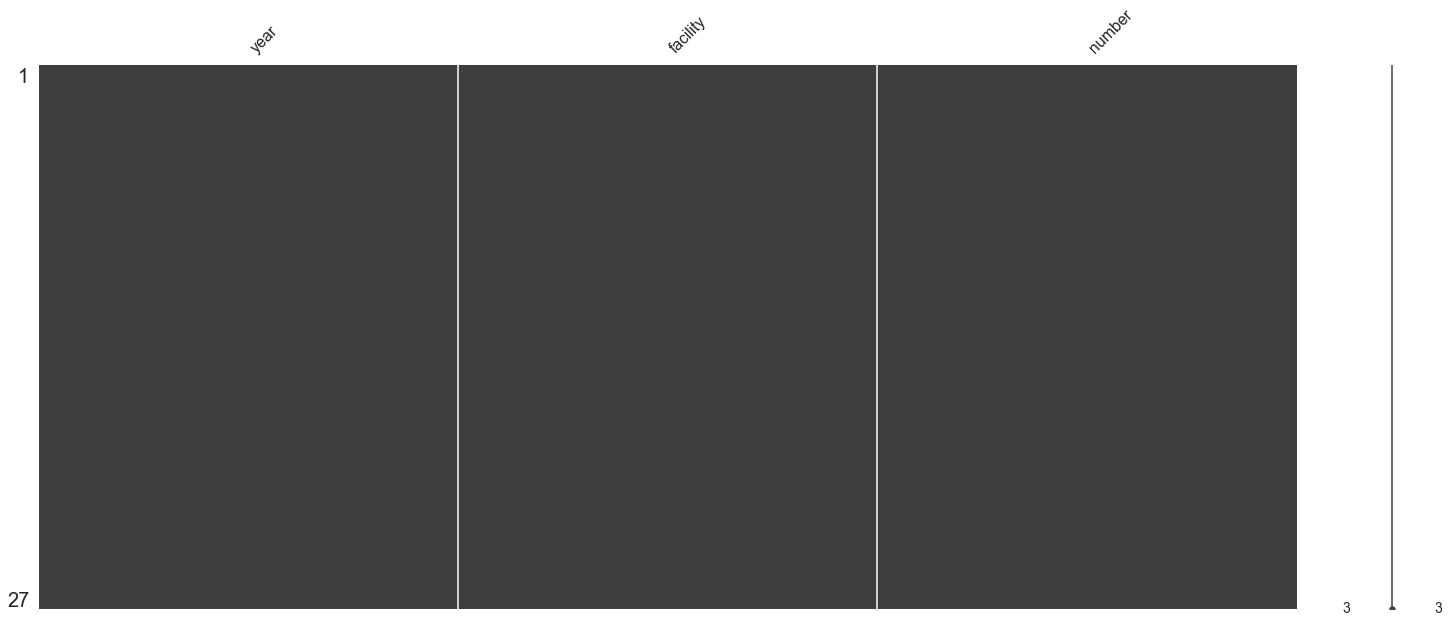

In [570]:
# visualisation of missing values in df 
import missingno as msno
msno.matrix(busFac)

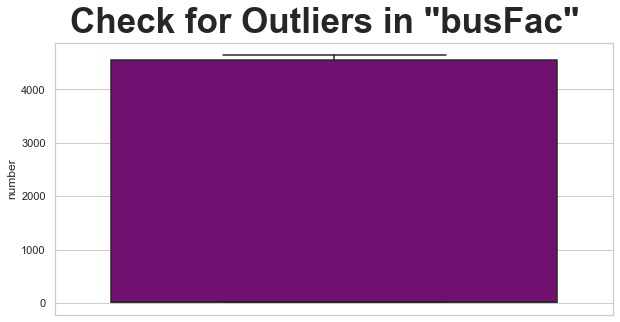

In [571]:
# -- identify outliers by plotting box plots -- 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers
# create figure & axis
fig, ax = plt.subplots(figsize=(10,5))
# set title for overall figure
fig.suptitle('Check for Outliers in "busFac"', weight="bold", fontsize=35)

# plot boxplot for 'number' column only 
sns.boxplot(y=busFac['number'], color='purple')
# remove scientific notation (y axis format from decimal to whole no.)
plt.ticklabel_format(style='plain', axis='y')

## Useful Insights 1 
- The effect of distance travelled by buses over time on commuters?

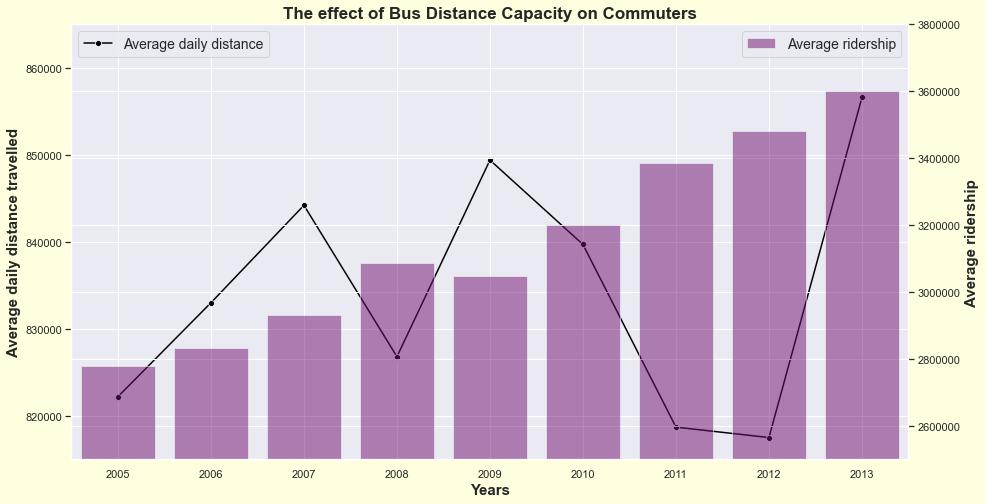

In [572]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set_style(style="darkgrid")
# set figure size & facecolor
sns.set(rc={"figure.figsize":(15,8), 'figure.facecolor':'lightyellow'})

# create a figure & axis
fig, ax1 = plt.subplots()

# plot line graph for 'distance_travelled_by_bus'
# set y-axis limit
sns.lineplot(data=busDistance['distance_travelled_by_bus'], marker='o', ax=ax1, color="black", label="Average daily distance").set(ylim=(815000,865000))

# set graph title & labels
ax1.set_title("The effect of Bus Distance Capacity on Commuters", weight="bold", fontsize=17)
ax1.set_xlabel("Years", weight="bold", fontsize=15)
ax1.set_ylabel("Average daily distance travelled", weight="bold", fontsize=15)

# set legend
plt.legend(loc='upper left', fontsize=14)

# plt.twin()
ax2 = ax1.twinx()

# plot barplot for 'average_ridership'
# set y-axis limit
sns.barplot(data = ridership, x='year', y='average_ridership', alpha=0.5, ax=ax2, color="purple", label="Average ridership").set(ylim=(2500000,3800000))

# set graph labels
ax2.set_ylabel("Average ridership", weight="bold", fontsize=15)

# remove scientific notation (y axis format from decimal to whole no.)
plt.ticklabel_format(style='plain', axis='y')

# set legend
plt.legend(loc="upper right", fontsize=14)

## Useful Insights 2 
- The effect of accessibility on commuters: number of bus stops

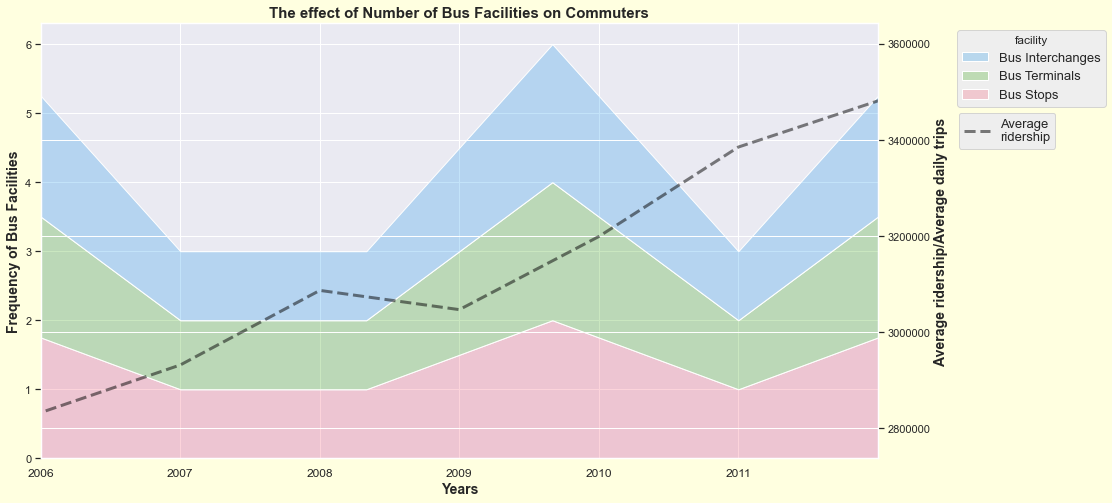

In [573]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set_style(style="darkgrid")
# set figure size & facecolor
sns.set(rc={"figure.figsize":(15,8), 'figure.facecolor':'lightyellow'})

# create a figure & axis
fig, ax = plt.subplots()

# plot hist plot for Bus Facilities
# get color palette 
palette = sns.color_palette("husl", 3)
# reverse the sequence of color palette
palette.reverse()
with palette:
    sns.histplot(data=busFac, x="year", hue="facility", discrete=False, element="poly", multiple="stack", alpha=0.3, ax=ax)

# set title & axis labels
ax.set_title("The effect of Number of Bus Facilities on Commuters", fontsize=15, weight='bold')
ax.set_xlabel("Years", fontsize=14, weight='bold')
ax.set_ylabel("Frequency of Bus Facilities", fontsize=14, weight='bold')

# set x-tick values
ax.set_xticks(np.arange(2006, 2012, 1))
# set x-tick labels
ax.set_xticklabels(np.arange(2006, 2012, 1), fontsize=12)

# change the legends location & set fontsize
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.28,1), title="facility", fontsize=13)

# plt.twinx()
ax2 = ax.twinx()

# plot barplot for 'average_ridership'
# set axis labels
sns.lineplot(data=ridership, x='year', y='average_ridership', alpha=0.5,  color="black", linewidth=3, linestyle="dashed", label="Average\nridership", ax=ax2).set_ylabel("Average ridership/Average daily trips", fontsize=14, weight='bold')

# set x-lim values
ax2.set_xlim(2006, 2012, 1)
# set x-tick labels
ax2.set_xticklabels(np.arange(2006, 2012, 1), fontsize=12)
# remove scientific notation (y axis format from decimal to whole no.)
plt.ticklabel_format(style='plain', axis='y')

# set legend
plt.legend()
# change the legends location & set fontsize
sns.move_legend(ax2, "upper right", bbox_to_anchor=(1.22,0.81), fontsize=13)

## Useful Insights 3 
- The effect of accessibility on commuters: bus passenger capacity

In [574]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# extract 2005 data
pastData = busPop[busPop['year'] == '2005']
pastNumber = pastData['no_of_buses']

# extract 2013 data
presentData = busPop[busPop['year'] == '2013']
presentNumber = presentData['no_of_buses']

# labels
labels = busPop['passenger_capacity']
labels = np.unique(labels)

# create subplots
# use 'domain' type 
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
# plot pie chart (past)
fig.add_trace(go.Pie(labels=labels, values=pastNumber, name="2005", marker_colors=px.colors.diverging.PiYG, scalegroup='one'),
              1, 1)
# plot pie chart (present)
fig.add_trace(go.Pie(labels=labels, values=presentNumber, name="2013", scalegroup='one'),
              1, 2)

# create a donut-like pie chart (hole)
fig.update_traces(hole=.4)

# set layout title 
fig.update_layout(
    title_text="The number of buses by passenger capacity in 2005 and 2013",
    # add annotations in the center of the donut pie charts
    annotations=[dict(text='2005', x=0.19, y=0.5, font_size=25, showarrow=False),
                 dict(text='2013', x=0.81, y=0.5, font_size=25, showarrow=False)])

# outline of pie charts
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
# uniform text size
fig.update_layout(uniformtext_minsize=13)

# show the pie charts
fig.show()

# --- End of Objective 1 ---